In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
data = pd.read_csv('/content/10.csv')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [27]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

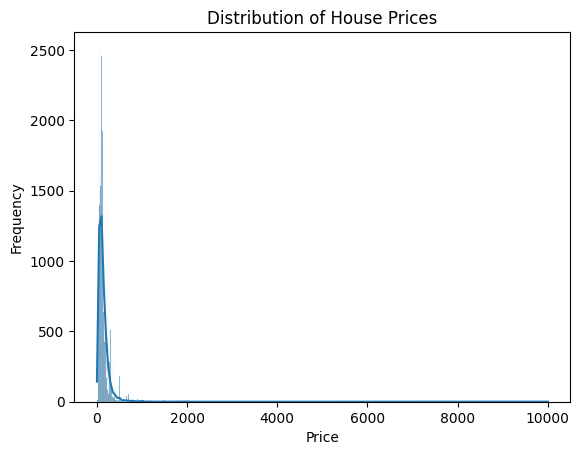

In [30]:
data.dropna(inplace=True)
sns.histplot(data['price'],kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

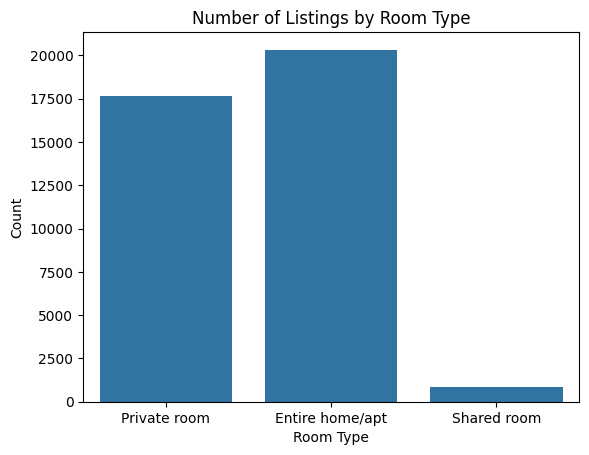

In [31]:
sns.countplot(x='room_type', data=data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()


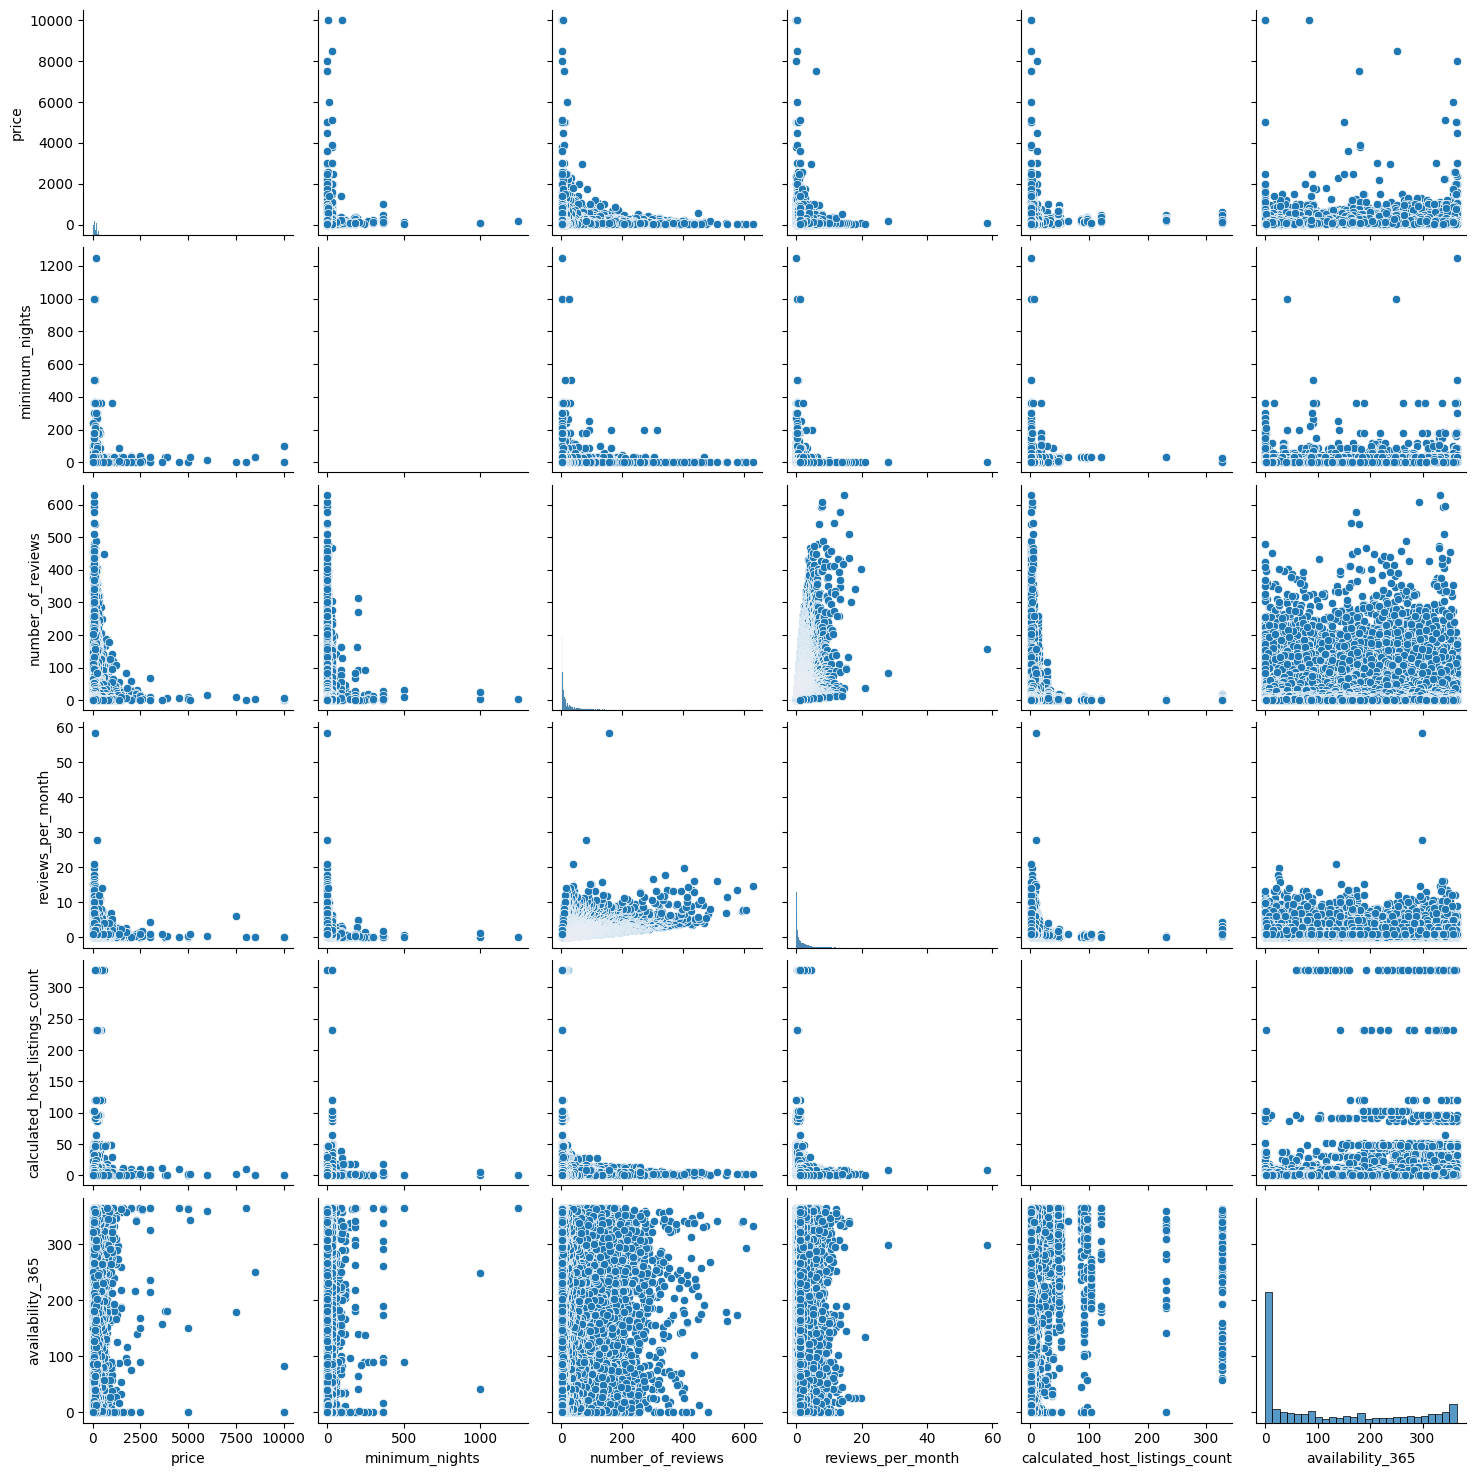

In [43]:

sns.pairplot(data, vars=['price', 'minimum_nights', 'number_of_reviews',
                         'reviews_per_month', 'calculated_host_listings_count',
                         'availability_365'])
plt.show()


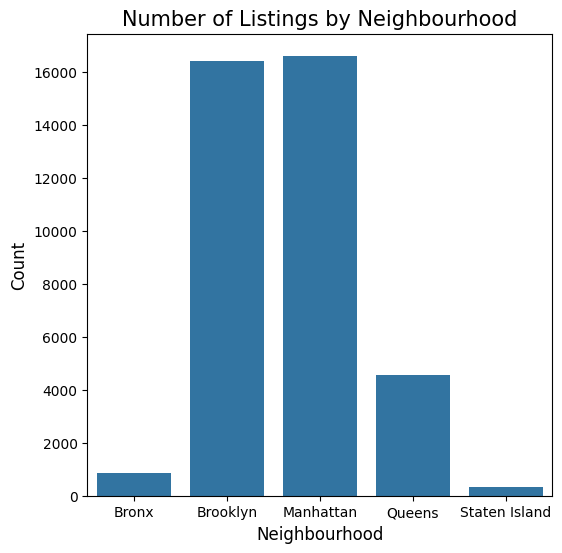

In [32]:
data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = data.groupby('boroname').agg('count').reset_index()

fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)
ax1.set_title('Number of Listings by Neighbourhood', fontsize=15)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)


<ipython-input-33-9c6e6fc67636>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))


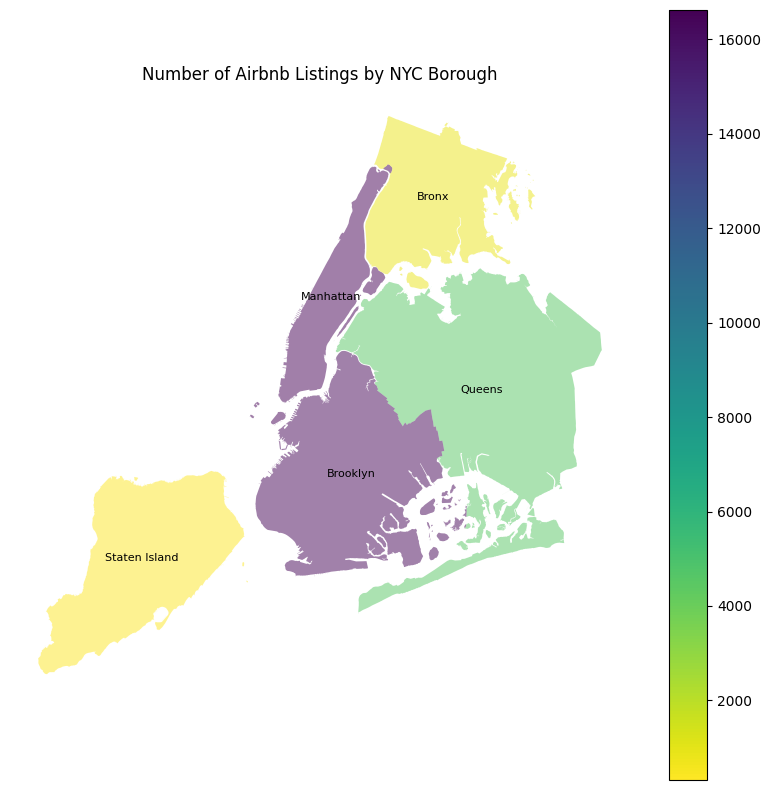

In [33]:
import geopandas as gpd
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

bc_geo.apply(lambda x: ax.annotate(
    text=x.boroname,
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8),
    axis=1)

plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')
plt.show()

In [34]:
data.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
boroname,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


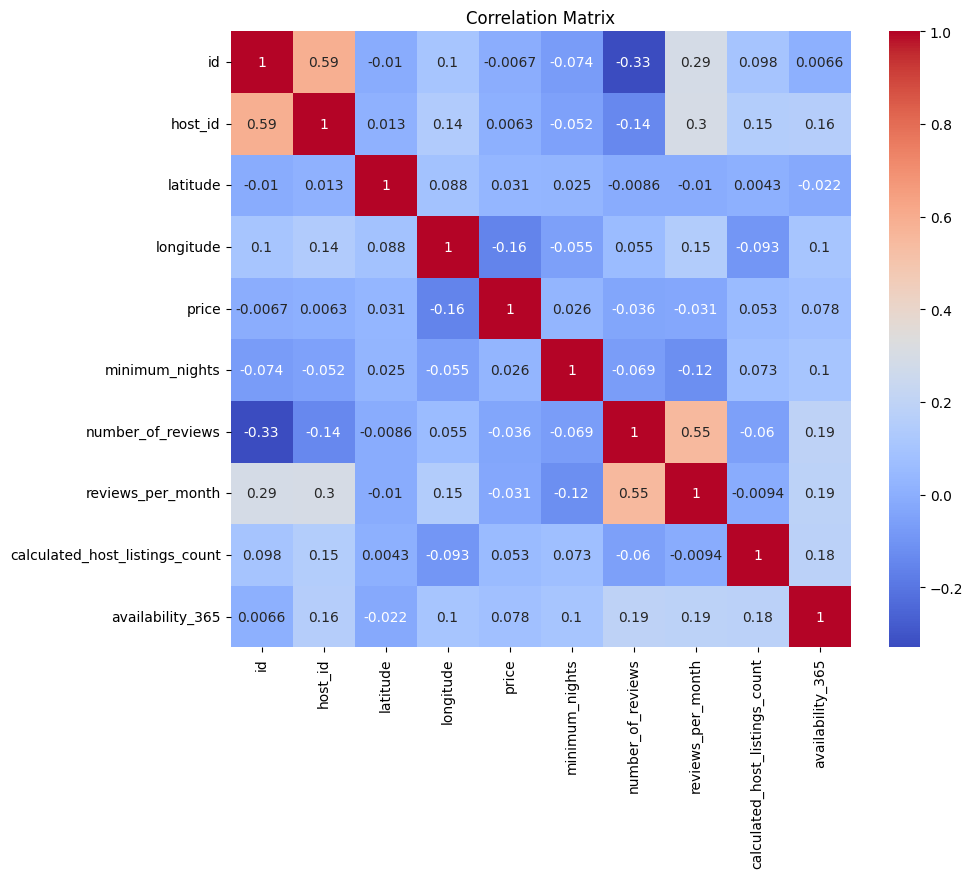

In [35]:
non_numeric_cols = data.select_dtypes(include=['object', 'category']).columns
data = data.drop(columns=non_numeric_cols)
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
features = ['latitude', 'longitude', 'minimum_nights',
            'number_of_reviews', 'reviews_per_month',
            'calculated_host_listings_count', 'availability_365']
target = 'price'

X = data[features]
y = data[target]
X = pd.get_dummies(X, columns=['minimum_nights'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 31834.57861230007
R-squared: 0.04832689337510654
Coefficients: [ 1.62110673e+02 -6.73478992e+02 -2.04684443e-01  8.52373712e-01
  1.40005972e-01  1.68631159e-01 -1.21274438e+02 -1.06791617e+02
 -9.48419498e+01 -9.34140200e+01 -9.69878063e+01 -8.66644730e+01
 -1.19196290e+02 -1.36214239e+02 -1.20624376e+02 -1.12985588e+02
 -1.00345786e+02 -1.57129521e+02 -1.20734723e+02 -1.22734183e+02
 -1.50466897e+02 -1.29157927e+02 -1.65004774e+02 -1.52753078e+02
 -1.40167794e+02 -1.45064264e+02 -1.60006012e+02 -1.95982414e+02
 -1.42056396e+02 -1.61476228e+02 -1.58978775e+02 -1.31410874e+02
 -1.57634434e+02 -1.00381172e+02 -1.37618115e+02 -1.22916855e+02
 -9.71715625e+01 -8.05463568e+01 -3.47432228e+02  2.66772394e+01
 -1.85275892e+02 -2.15021832e+02  6.02385071e+01  2.80067525e-10
 -2.04200193e+02 -1.43219710e+02 -1.83506324e+02 -1.57041832e+02
 -7.55675117e+01 -5.32015972e+01 -1.92304404e+02 -1.46606175e+02
 -1.42488977e+02 -1.44724176e+02 -1.17847357e+02 -1.67816654e+02
  4.024